---Test---
R2 Score:  0.8164780207877907
MSE:  0.008757855248019602
MAE:  0.07184918419372367
---Train---
R2 Score:  0.8187828419089384
MSE:  0.0075287241650694
MAE:  0.06600904266521375

MAPE:  0.31207559891653097


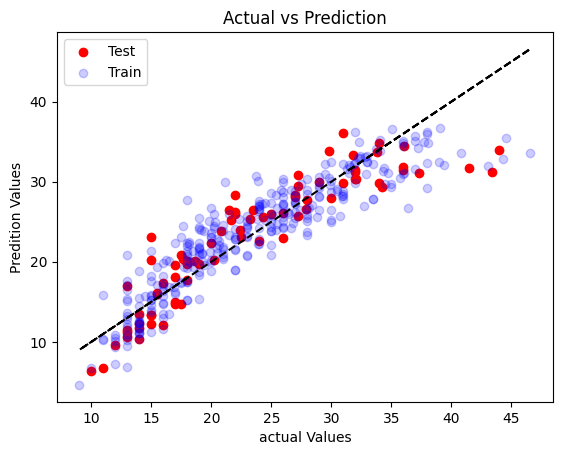

In [9]:
###··· TURBINE DATASET ···### 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.metrics import *
from matplotlib import pyplot as plt

# Part 1: Selecting and analyzing the dataset
#Load the dataset
car_mpg_dataset = pd.read_csv("A1-car-mpg.txt", header=0, na_values = "?", comment='\t', sep=" ", skipinitialspace=True)
    #Clean the dataset
car_mpg_dataset.drop(columns=['Car_Model'], inplace=True)
car_mpg_dataset.dropna(inplace=True)
x = car_mpg_dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model_year', 'Origin']]
y = car_mpg_dataset[["MPG"]]

origin = car_mpg_dataset.pop('Origin')
car_mpg_dataset['USA'] = (origin == 1)*1.0
car_mpg_dataset['Europe'] = (origin == 2)*1.0
car_mpg_dataset['Japan'] = (origin == 3)*1.0
    #Scale the data 
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y)
    #Split the data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.20, shuffle=True)

# Part 2: Implementation of NN
model = LinearRegression() 
history = model.fit(x_train, y_train)

# Part 3: Obtaining predictions and plot the data
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

print("---Test---")
print("R2 Score: ", r2_score(y_test, y_pred_test))
print("MSE: ", mean_squared_error(y_test, y_pred_test))
print("MAE: ", mean_absolute_error(y_test, y_pred_test))
print("---Train---")
print("R2 Score: ", r2_score(y_train, y_pred_train))
print("MSE: ", mean_squared_error(y_train, y_pred_train))
print("MAE: ", mean_absolute_error(y_train, y_pred_train))
print("")
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred_test))

y_test_unscaled = scaler.inverse_transform(y_test)
y_pred_test_unscaled = scaler.inverse_transform(y_pred_test)
y_train_unscaled = scaler.inverse_transform(y_train)
y_pred_train_unscaled = scaler.inverse_transform(y_pred_train)

plt.scatter(y_test_unscaled, y_pred_test_unscaled, color="red", label="Test")
plt.scatter(y_train_unscaled, y_pred_train_unscaled, color="blue", alpha=0.2, label="Train")
plt.xlabel("actual Values")
plt.ylabel("Predition Values")
plt.title("Actual vs Prediction")
plt.plot(y, y, "--",color="black")
plt.legend()
plt.show()
